# Step 2: Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load 

In [2]:
Data = pd.read_csv(r"C:\Users\ACER\Downloads\Trafic.csv")
Data1 = pd.DataFrame(Data)
Data1

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,01-07-2023,New,Mobile,120,3
1,2,02-07-2023,Returning,Desktop,300,5
2,3,03-07-2023,New,Tablet,240,4
3,4,04-07-2023,Returning,Mobile,180,3
4,5,05-07-2023,New,Desktop,350,6
5,6,06-07-2023,Returning,Tablet,260,4
6,7,07-07-2023,New,Mobile,190,3
7,8,08-07-2023,Returning,Desktop,400,7
8,9,09-07-2023,New,Tablet,210,4
9,10,10-07-2023,Returning,Mobile,220,5


#  Convert 'Date' column to datetime format

In [3]:
Data1['Date'] = pd.to_datetime(Data1['Date'], errors='coerce')

# Step 3: Understand the Dataset

In [6]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", Data1.shape)

Shape of dataset: (10, 6)


In [7]:
# Data types of each column
print("\nData types:\n", Data1.dtypes)


Data types:
 VisitID                     int64
Date               datetime64[ns]
UserType                   object
Device                     object
SessionDuration             int64
PagesVisited                int64
dtype: object


In [9]:
# Summary statistics for numerical columns
print("\nSummary statistics:\n", Data1.describe())


Summary statistics:
         VisitID                 Date  SessionDuration  PagesVisited
count  10.00000                   10        10.000000     10.000000
mean    5.50000  2023-05-23 00:00:00       247.000000      4.400000
min     1.00000  2023-01-07 00:00:00       120.000000      3.000000
25%     3.25000  2023-03-14 18:00:00       195.000000      3.250000
50%     5.50000  2023-05-22 12:00:00       230.000000      4.000000
75%     7.75000  2023-07-30 06:00:00       290.000000      5.000000
max    10.00000  2023-10-07 00:00:00       400.000000      7.000000
std     3.02765                  NaN        83.672643      1.349897


In [10]:
# Check for missing values
print("\nMissing values:\n", Data1.isnull().sum())



Missing values:
 VisitID            0
Date               0
UserType           0
Device             0
SessionDuration    0
PagesVisited       0
dtype: int64


# Step 4: Session Duration by Device

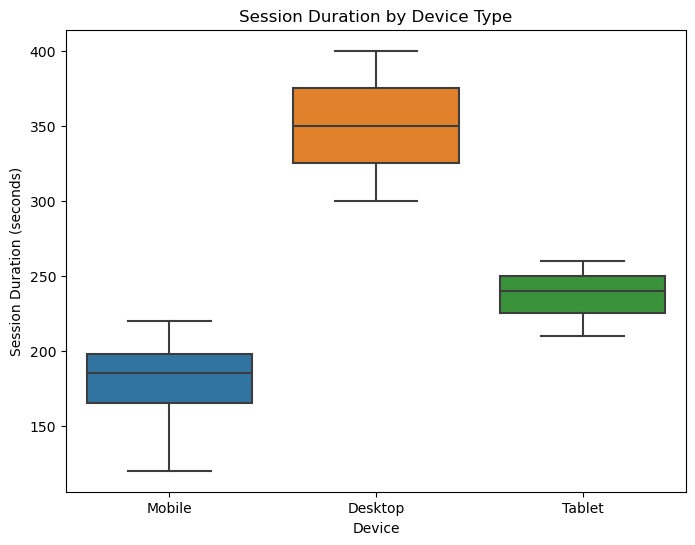

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Data1, x='Device', y='SessionDuration')
plt.title('Session Duration by Device Type')
plt.xlabel('Device')
plt.ylabel('Session Duration (seconds)')
plt.show()

# Step 5: Pages Visited by User Type

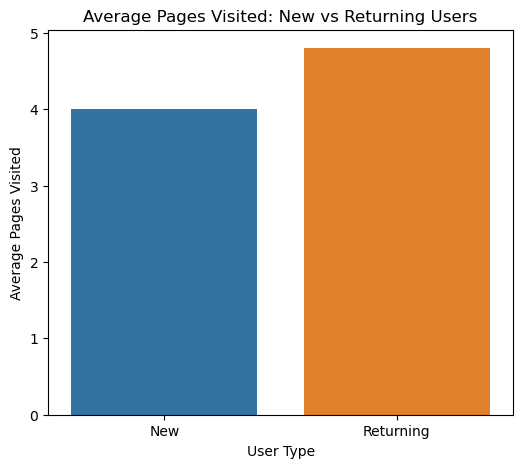

In [26]:
# Group by User_Type and calculate the average number of pages visited
user_engagement = Data1.groupby('UserType')['PagesVisited'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(6, 5))
sns.barplot(data=user_engagement, x='UserType', y='PagesVisited')
plt.title('Average Pages Visited: New vs Returning Users')
plt.xlabel('User Type')
plt.ylabel('Average Pages Visited')
plt.show()


# Step 6: Trend Over Time: Average Session Duration

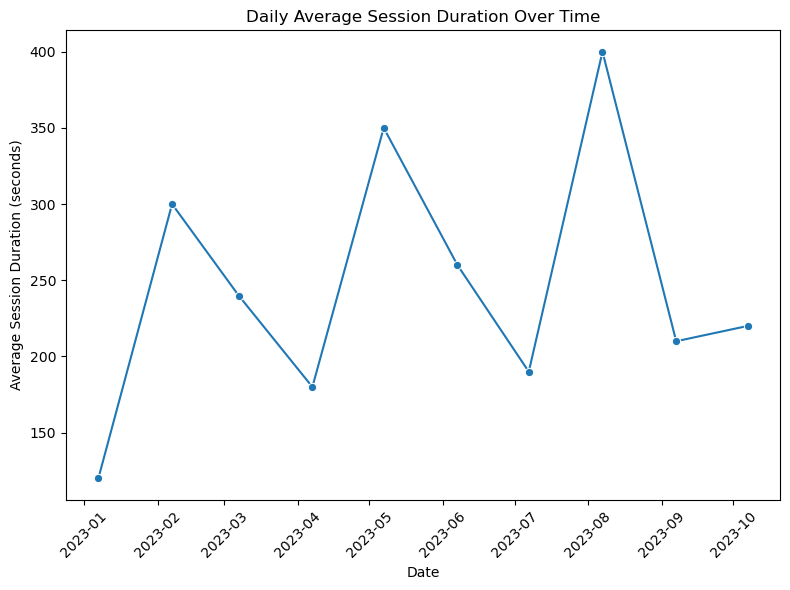

In [27]:
# Group by date and calculate average session duration
daily_trend = Data1.groupby('Date')['SessionDuration'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(8, 6))
sns.lineplot(data=daily_trend, x='Date', y='SessionDuration', marker='o')
plt.title('Daily Average Session Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Session Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 7: (Optional) Add More Insights

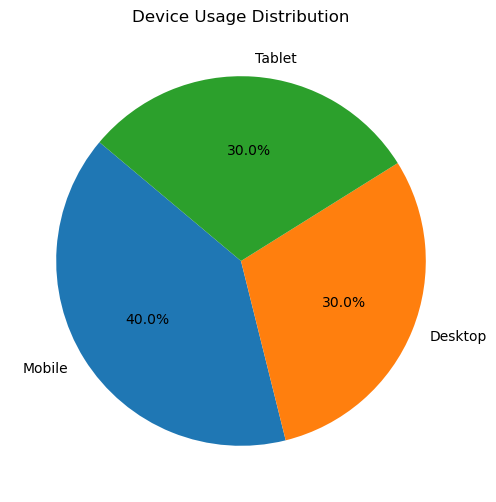

In [28]:
# Count how many sessions per device
device_counts = Data1['Device'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
device_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Device Usage Distribution')
plt.ylabel('')  # Hide y-label for cleaner look
plt.show()


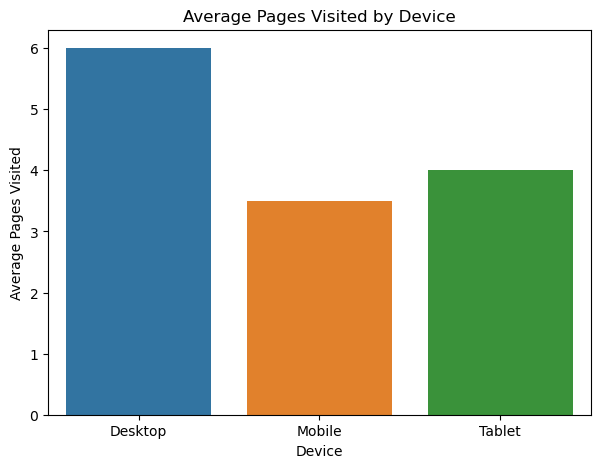

In [21]:
# Group by device and calculate average pages visited
device_pages = Data1.groupby('Device')['PagesVisited'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(7, 5))
sns.barplot(data=device_pages, x='Device', y='PagesVisited')
plt.title('Average Pages Visited by Device')
plt.xlabel('Device')
plt.ylabel('Average Pages Visited')
plt.show()


Top 5 Peak Traffic Days:
        Date  VisitCount
0 2023-01-07           1
1 2023-02-07           1
2 2023-03-07           1
3 2023-04-07           1
4 2023-05-07           1


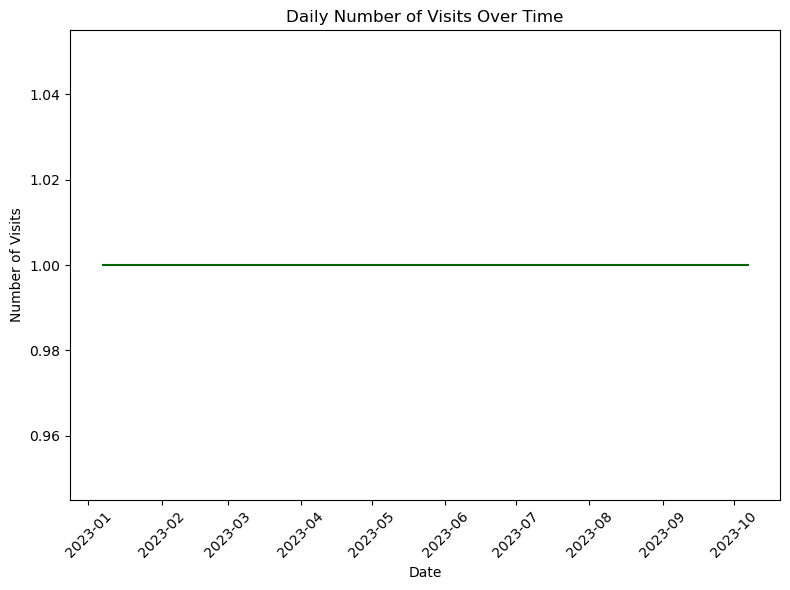

In [24]:
# Count number of visits per day
daily_visits = Data1['Date'].value_counts().sort_index().reset_index()
daily_visits.columns = ['Date', 'VisitCount']

# Sort to find peak days
peak_days = daily_visits.sort_values(by='VisitCount', ascending=False).head(5)

print("Top 5 Peak Traffic Days:")
print(peak_days)

# Optional: plot visits over time
plt.figure(figsize=(8, 6))
sns.lineplot(data=daily_visits, x='Date', y='VisitCount', color='darkgreen')
plt.title('Daily Number of Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 8: Write a Conclusion

Goal: Conclude by capturing your main takeaways.

In a Markdown cell within your notebook, give your answer:

Which gadget keeps the battery for the longest?

Are there more deep interactions with new or returning users?

Are there any obvious changes in the time spend in sessions or the number of pages visited?